## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [326]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [327]:
#Import all the necessary modules
import pandas as pd
import numpy as np

#For the process of label encoding, Import scikit-learn.
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

# Import Linear and Logistic Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

In [328]:
#Load the file from local directory using pd.read_csv which is a special form of read_table

st_df = pd.read_csv(r"C:\Users\Admin\Downloads\lab_3\students-data.csv", delimiter = ';')
st_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
sns.barplot school

In [329]:
st_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [330]:
st_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [331]:
st_df.index.name = 'number'
st_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [332]:
# Making a list of missing value types
missing_values = ["0"]
st_missing_df = pd.read_csv(r"C:\Users\Admin\Downloads\lab_3\students-data.csv", delimiter = ';', na_values = missing_values)
st_missing_df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64

Attribute Information:

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

As per the attribute information and the missing values data only the column name failures is having missing values 0 
failures - number of past class failures (numeric: n if 1<=n<3, else 4)

So we need to replace the '0' value in failures with median value  or else we need to drop it

In [333]:
st_df[['failures']].replace(0,st_df[['failures']].mean())
st_df.mean()
#st_df[['failures']]

age           16.696203
Medu           2.749367
Fedu           2.521519
traveltime     1.448101
studytime      2.035443
failures       0.334177
famrel         3.944304
freetime       3.235443
goout          3.108861
Dalc           1.481013
Walc           2.291139
health         3.554430
absences       5.708861
G1            10.908861
G2            10.713924
G3            10.415190
dtype: float64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [334]:
##st_df.select_dtypes(include=['object'])
obj_df = st_df.select_dtypes(include=['object']).copy()
obj_df.head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [335]:
st_df.var()
#st_df.std()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [336]:
#st_df.var()[st_df.var() < threshold].index.values
st_df = st_df.drop(st_df.var()[st_df.var() < 1].index.values, axis=1)
st_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [337]:
#obj data type data frame
obj_df = st_df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [338]:
#this can concatenate columns with other data types.
int_df = st_df.select_dtypes(include=['int64']).copy()
float_df = st_df.select_dtypes(include=['float64']).copy()
df_int_float = pd.concat([float_df,int_df], axis=1, join_axes=[int_df.index])

#let us encode data with respect to an object column
le = preprocessing.LabelEncoder()
le.fit(obj_df["Mjob"].astype(str))
list(le.classes_)

['at_home', 'health', 'other', 'services', 'teacher']

In [339]:
#let us encode all classes now
obj_df_trf=obj_df.astype(str).apply(le.fit_transform)

# Let’s concatenate all the columns to get the encoded data.
st_df = pd.concat([df_int_float,obj_df_trf], axis=1, join_axes=[df_int_float.index])
st_df.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,1,0,1,1,0,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [340]:
df_final['G1'] = np.where(df_final['G1']>=10, 1,0)
df_final['G2'] = np.where(df_final['G2']>=10, 1,0)
df_final['G3'] = np.where(df_final['G3']>=10, 1,0)
df_final.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,0,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,0,0,0,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,0,0,...,1,0,0,1,1,0,1,1,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [341]:
st_df.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,1,0,1,1,0,0


In [342]:
st_X=st_df.drop('G3',axis=1)
X=np.array(st_X)
st_X.shape

(395, 26)

In [343]:
st_Y=st_df['G3']
Y=np.array(st_Y)
st_Y.shape

(395,)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

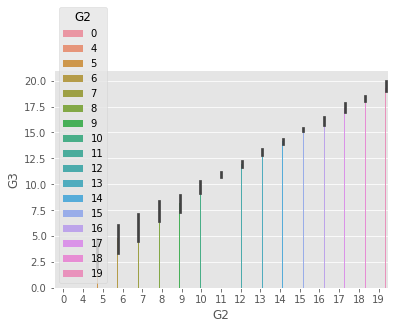

In [344]:
# Pairplot using sns
sns.barplot(st_df['G2'], st_df['G3'], hue = st_df['G2'])

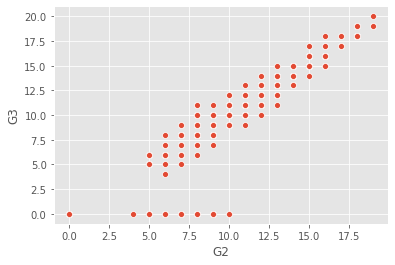

In [345]:
sns.scatterplot(x='G2', y='G3', data = st_df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

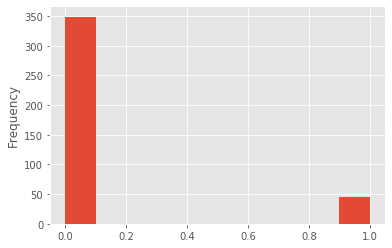

In [348]:
st_df["school"].plot(kind="hist")

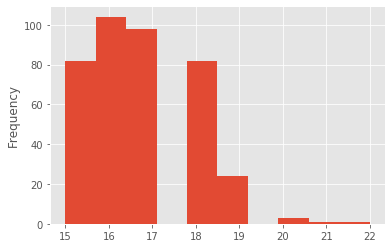

In [349]:
st_df["age"].plot(kind="hist")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [350]:
array = st_df.values
X = array[:,0:26] # select all rows and first 8 columns which are the attributes
Y = array[:,26]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.25 # taking 75:25 training and test set since the training size is 300 out of 395 values
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [351]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [352]:
y_predict = regression_model.predict(X_test)
model_score = regression_model.score(X_test, y_test)
print(model_score)

print(f1_score(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6666666666666666
0.15384615384615385
[[63  7]
 [26  3]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        70
           1       0.30      0.10      0.15        29

    accuracy                           0.67        99
   macro avg       0.50      0.50      0.47        99
weighted avg       0.59      0.67      0.61        99



# Naive bayes with Iris data

### Import Iris.csv

In [353]:
#Load the file from local directory using pd.read_csv which is a special form of read_table

iris_df = pd.read_csv(r"C:\Users\Admin\Downloads\lab_3\Iris.csv")
iris_df.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [354]:
iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [355]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [356]:
iris_X=iris_df.drop('Class',axis=1)
X=np.array(iris_X)
iris_X.shape

(150, 4)

In [357]:
iris_Y=iris_df['Class']
Y=np.array(iris_Y)
iris_Y.shape

(150,)

### Find the distribution of target variable (Class)

In [358]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
iris_df.groupby(["Class"]).count()

# The species is evenly distributed. The ratio is almost 1:1:1 .

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

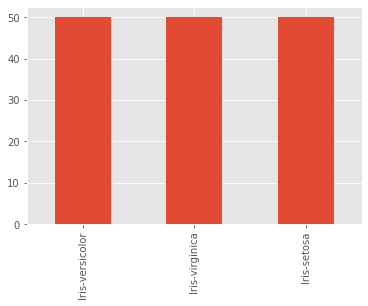

In [359]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

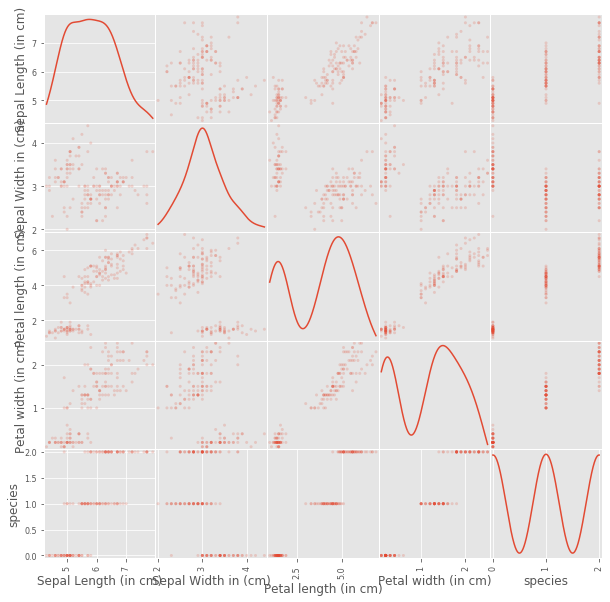

In [360]:
iris = datasets.load_iris()
iris_df['species'] = iris['target']
plt.style.use('ggplot')
scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

### Summary Statistics and explain insights for at least 2 variables

In [361]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
#data for few attributes are skewed, especially for the variable "Petal Length" and "Petal Width"

#The mean for Petal Length is 4(rounded) while the median is 4.35 which clearly indicates an extreme long tail on the left
#The mean for Petal width is 1(rounded) while the median is 1.30 which clearly indicates an extreme long tail on the left

### Correlation among all variables and give your insights

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


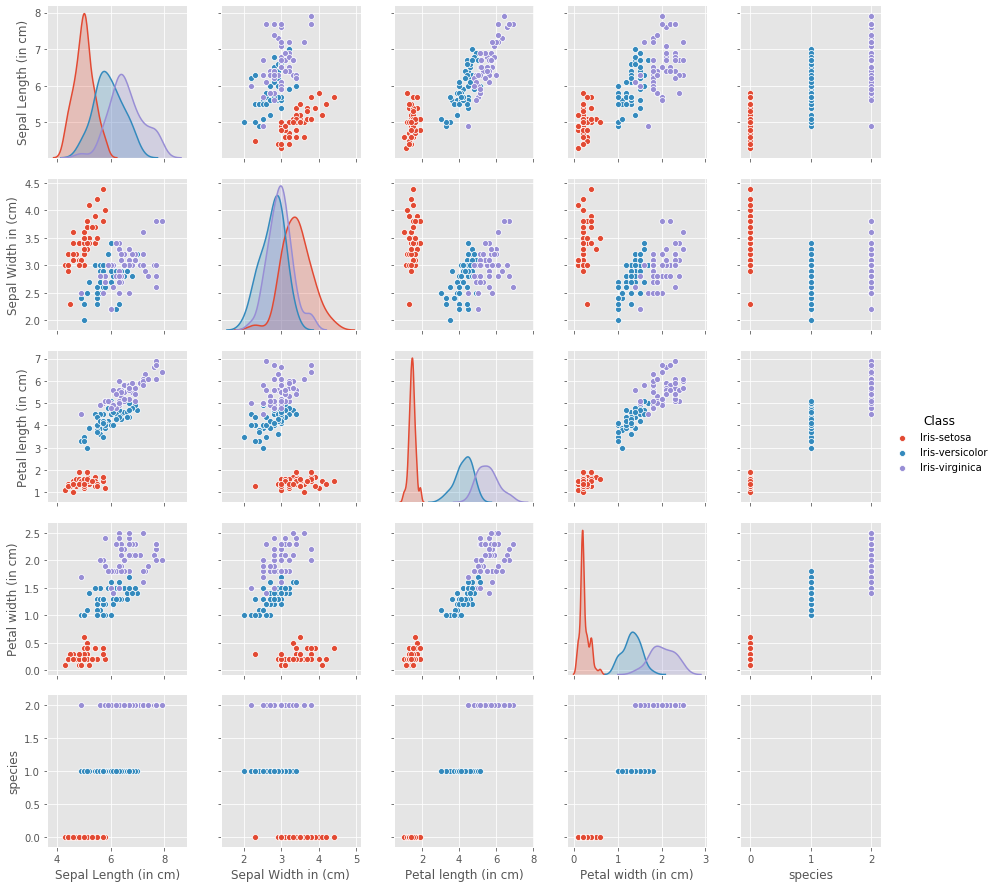

In [362]:
# Pairplot using sns

sns.pairplot(iris_df, hue = "Class")

### Split data in Training and Validation in 80:20

In [363]:
array = iris_df.values
X = array[:,0:4] # select all rows and first 4 columns which are the attributes
Y = array[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.20 # taking 80:20 training and test set
seed = 8  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [373]:
iris_df_sklearn = iris_df.copy()

from sklearn.preprocessing import LabelEncoder

iris_cat = LabelEncoder()
iris_df_sklearn['Class'] = iris_cat.fit_transform(iris_df_sklearn['Class'])

iris_df_sklearn.head()


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [374]:
# scale all the columns of the iris_df. This will produce a numpy array
iris_df_scaled = preprocessing.scale(iris_df_sklearn)

In [375]:
iris_df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -1.22474487e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.341

In [376]:
#convert the numpy array back into a dataframe 

iris_df_scaled = pd.DataFrame(iris_df_scaled, columns=iris_df.columns)

In [377]:
#browse the contents of the dataframe. Check that all the values are now z scores

iris_df_scaled

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745,-1.224745
5,-0.537178,1.957669,-1.170675,-1.050031,-1.224745,-1.224745
6,-1.506521,0.800654,-1.341272,-1.181504,-1.224745,-1.224745
7,-1.021849,0.800654,-1.284407,-1.312977,-1.224745,-1.224745
8,-1.748856,-0.356361,-1.341272,-1.312977,-1.224745,-1.224745
9,-1.143017,0.106445,-1.284407,-1.444450,-1.224745,-1.224745


### Train and Fit NaiveBayes Model

In [378]:
# Separate the independent attributes i.e. columns 0 to 4 and store them in X array
# Store the target column (column 5) into Y array

array = iris_df.values
X = array[:,0:4] # select all rows and first 4 columns which are the attributes
Y = array[:,4]   # select all rows and the 5th column which is the classification 

In [379]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [380]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [381]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      0.81      0.84        16
 Iris-virginica       0.83      0.88      0.86        17

       accuracy                           0.89        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.89      0.89      0.89        45

[[12  0  0]
 [ 0 13  3]
 [ 0  2 15]]
